# Cryptocurrency Price Prediction

In [30]:
# pip install yfinance

In [31]:
import pandas as pd
import numpy as np
import yfinance as yf
import datetime
from datetime import date, timedelta

today = date.today()

d1 = today.strftime('%Y-%m-%d')
end_date = d1

d2 = date.today() - timedelta(days=1000)
d2 = d2.strftime('%Y-%m-%d')
start_date = d2

# print(start_date)
data = yf.download('BTC-USD',
                   start=start_date,
                   end=end_date,
                   progress=False,
                   auto_adjust=False)

# data = data.reset_index()
# print(data)

# data = [['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]
# data.columns = ['date', 'open', 'high', 'low', 'close', 'adj close', 'volume']
# print(data)

data['Date'] = data.index

data = data[['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]
data.reset_index(drop=True, inplace=True)
data.columns = data.columns.get_level_values(0)
print(data.head(n=1))


# data.to_csv('dataset/new_dataset.csv', index=False)
# dataframe = pd.read_csv('dataset/new_dataset.csv')

Price       Date          Open          High           Low         Close  \
0     2022-12-28  16716.400391  16768.169922  16497.556641  16552.572266   

Price     Adj Close       Volume  
0      16552.572266  17005713920  


In [32]:
print(data.head())

Price       Date          Open          High           Low         Close  \
0     2022-12-28  16716.400391  16768.169922  16497.556641  16552.572266   
1     2022-12-29  16552.322266  16651.755859  16508.683594  16642.341797   
2     2022-12-30  16641.330078  16643.427734  16408.474609  16602.585938   
3     2022-12-31  16603.673828  16628.986328  16517.519531  16547.496094   
4     2023-01-01  16547.914062  16630.439453  16521.234375  16625.080078   

Price     Adj Close       Volume  
0      16552.572266  17005713920  
1      16642.341797  14472237479  
2      16602.585938  15929162910  
3      16547.496094  11239186456  
4      16625.080078   9244361700  


In [33]:
print(data.tail())

Price       Date           Open           High            Low          Close  \
994   2025-09-17  116840.507812  117328.609375  114794.976562  116468.507812   
995   2025-09-18  116461.265625  117911.789062  116188.796875  117137.203125   
996   2025-09-19  117137.671875  117479.757812  115141.820312  115688.859375   
997   2025-09-20  115691.125000  116191.148438  115473.523438  115721.960938   
998   2025-09-21  115730.226562  115901.085938  115252.578125  115306.093750   

Price      Adj Close       Volume  
994    116468.507812  60528025996  
995    117137.203125  49457272032  
996    115688.859375  38828473971  
997    115721.960938  22864449614  
998    115306.093750  22495852193  


In [34]:
data.shape

(999, 7)

In [35]:
import plotly.graph_objects as pg
from plotly.offline import iplot
figure = pg.Figure(data=[pg.Candlestick(x=data['Date'],
                                        open=data['Open'],
                                        high=data['High'],
                                        low=data['Low'],
                                        close=data['Close'])])

# figure.update_layout(title = 'Bitcoin Price Analysis',
#                      xaxis_rangeslider_visible = False)
figure.show()
# iplot(figure)

In [36]:
# df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv')

# print(df.head())
# print(df.tail())
# print(df['AAPL.Open'])
# print(df.shape)

# fig = pg.Figure(data=[pg.Candlestick(x=df['Date'],
#                 open=df['AAPL.Open'],
#                 high=df['AAPL.High'],
#                 low=df['AAPL.Low'],
#                 close=df['AAPL.Close'])])

# fig.show()

In [37]:
correlation = data.corr()
print(correlation['Close'].sort_values(ascending=False))

Price
Close        1.000000
Adj Close    1.000000
High         0.999460
Low          0.999267
Open         0.998661
Date         0.960406
Volume       0.669199
Name: Close, dtype: float64


In [38]:
# pip install autots

## Prediction the model

In [39]:
from autots import AutoTS
model = AutoTS(forecast_length=30, frequency='infer', ensemble='simple')
model = model.fit(data, date_col='Date', value_col='Close', id_col=None)

prediction = model.predict()
forecast = prediction.forecast
# print(forecast)

Using 2 cpus for n_jobs.


Data frequency is: D, used frequency is: D
Model Number: 1 with model AverageValueNaive in generation 0 of 25
Model Number: 2 with model AverageValueNaive in generation 0 of 25
Model Number: 3 with model AverageValueNaive in generation 0 of 25
Model Number: 4 with model DatepartRegression in generation 0 of 25
Model Number: 5 with model DatepartRegression in generation 0 of 25
Model Number: 6 with model DatepartRegression in generation 0 of 25
Model Number: 7 with model DatepartRegression in generation 0 of 25
Template Eval Error: ImportError('Tensorflow not available, install with pip install tensorflow.') in model 7 in generation 0: DatepartRegression
Model Number: 8 with model ETS in generation 0 of 25
Model Number: 9 with model ETS in generation 0 of 25
Model Number: 10 with model GLM in generation 0 of 25
Model Number: 11 with model GLM in generation 0 of 25
Model Number: 12 with model GLS in generation 0 of 25
Model Number: 13 with model GLS in generation 0 of 25
Model Number: 14

## Visualising the result

In [40]:
# pip install matplotlib seaborn

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from autots import AutoTS
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings

warnings.filterwarnings('ignore')

# Set style untuk matplotlib
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

## Fungsi untuk Visualisasi Data

### Eksplorasi Data & EDA (Exploration Data Analysis)

In [85]:
def plot_crypto_eda(data):
    """
    Comprehensive EDA untuk cryptocurrency data
    """
    fig = make_subplots(
        rows=2, cols=2,
        subplot_titles=('Price Over Time', 'Volume Analysis', 
                       'Price Distribution', 'Daily Returns'),
        specs=[[{"secondary_y": True}, {"secondary_y": False}],
               [{"secondary_y": False}, {"secondary_y": False}]]
    )
    
    # 1. Price over time with volume
    fig.add_trace(
        go.Scatter(x=data['Date'], y=data['Close'], 
                  name='Close Price', line=dict(color='#1f77b4', width=2)),
        row=1, col=1
    )
    
    fig.add_trace(
        go.Scatter(x=data['Date'], y=data['Volume'], 
                  name='Volume', fill='tonexty', opacity=0.3),
        row=1, col=1, secondary_y=True
    )
    
    # 2. Volume analysis
    fig.add_trace(
        go.Bar(x=data['Date'][-60:], y=data['Volume'][-60:], 
               name='Volume (Last 60 days)', marker_color='orange'),
        row=1, col=2
    )
    
    # 3. Price distribution
    fig.add_trace(
        go.Histogram(x=data['Close'], nbinsx=50, name='Price Distribution',
                    marker_color='green', opacity=0.7),
        row=2, col=1
    )
    
    # 4. Daily returns
    returns = data['Close'].pct_change().dropna() * 100
    fig.add_trace(
        go.Scatter(x=data['Date'][1:], y=returns, 
                  mode='lines', name='Daily Returns (%)',
                  line=dict(color='red', width=1)),
        row=2, col=2
    )
    
    fig.update_layout(
        height=800, showlegend=True,
        title_text="Cryptocurrency Data - Exploratory Analysis",
        title_x=0.5, title_font_size=20
    )
    
    return fig

### Statistik Analisis

In [86]:
def plot_statistical_analysis(data):
    """
    Statistical insights dari cryptocurrency data
    """
    df = data.copy().reset_index(drop=True)
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Statistical Analysis of Cryptocurrency Data', fontsize=16, y=1.02)
    
    # 1. Moving averages
    df['MA_7'] = df['Close'].rolling(window=7).mean()
    df['MA_30'] = df['Close'].rolling(window=30).mean()
    
    axes[0,0].plot(df['Date'], df['Close'], label='Close Price', alpha=0.7)
    axes[0,0].plot(df['Date'], df['MA_7'], label='7-day MA', linewidth=2)
    axes[0,0].plot(df['Date'], df['MA_30'], label='30-day MA', linewidth=2)
    axes[0,0].set_title('Price with Moving Averages')
    axes[0,0].legend()
    
    # 2. Volatility 
    df['returns'] = df['Close'].pct_change()
    df['volatility'] = df['returns'].rolling(window=30).std() * np.sqrt(365) * 100
    
    vol_data = df[['Date', 'volatility']].dropna()  # Auto-aligned!
    axes[0,1].plot(vol_data['Date'], vol_data['volatility'], color='red')
    axes[0,1].set_title('30-Day Rolling Volatility (%)')
    axes[0,1].tick_params(axis='x', rotation=45)
    
    # 3. Price vs Volume correlation
    axes[1,0].scatter(df['Volume'], df['Close'], alpha=0.5)
    correlation = df['Volume'].corr(df['Close'])
    axes[1,0].set_title(f'Price vs Volume (Correlation: {correlation:.3f})')
    axes[1,0].set_xlabel('Volume')
    axes[1,0].set_ylabel('Price')
    
    # 4. Returns distribution
    returns = df['Close'].pct_change().dropna() * 100
    axes[1,1].hist(returns, bins=50, alpha=0.7, color='green')
    axes[1,1].axvline(returns.mean(), color='red', linestyle='--', 
                     label=f'Mean: {returns.mean():.2f}%')
    axes[1,1].set_title('Daily Returns Distribution')
    axes[1,1].set_xlabel('Returns (%)')
    axes[1,1].legend()
    
    plt.tight_layout()
    return fig

### Visualisasi Model Prediction

In [87]:
def plot_prediction_results(data, model, prediction):
    """
    Visualisasi hasil prediksi AutoTS
    """
    forecast = prediction.forecast
    
    # Create interactive plot
    fig = go.Figure()
    
    # Historical data (last 90 days untuk clarity)
    recent_data = data.tail(90)
    fig.add_trace(go.Scatter(
        x=recent_data['Date'],
        y=recent_data['Close'],
        mode='lines',
        name='Historical Price',
        line=dict(color='blue', width=2)
    ))
    
    # Forecast
    forecast_dates = pd.date_range(
        start=data['Date'].iloc[-1] + pd.Timedelta(days=1),
        periods=len(forecast),
        freq='D'
    )
    
    fig.add_trace(go.Scatter(
        x=forecast_dates,
        y=forecast['Close'],
        mode='lines+markers',
        name='Forecast',
        line=dict(color='red', width=2, dash='dash'),
        marker=dict(size=6)
    ))
    
    # Add confidence intervals if available
    if hasattr(prediction, 'upper_forecast') and hasattr(prediction, 'lower_forecast'):
        fig.add_trace(go.Scatter(
            x=forecast_dates,
            y=prediction.upper_forecast['Close'],
            mode='lines',
            line=dict(color='rgba(255,0,0,0)'),
            showlegend=False,
            name='Upper Bound'
        ))
        
        fig.add_trace(go.Scatter(
            x=forecast_dates,
            y=prediction.lower_forecast['Close'],
            mode='lines',
            line=dict(color='rgba(255,0,0,0)'),
            fill='tonexty',
            fillcolor='rgba(255,0,0,0.2)',
            name='Confidence Interval'
        ))
    
    fig.update_layout(
        title='Cryptocurrency Price Prediction - 30 Days Forecast',
        xaxis_title='Date',
        yaxis_title='Price (USD)',
        height=600,
        showlegend=True,
        hovermode='x unified'
    )
    
    return fig

### Model Evaluasi dan Akurasi

In [88]:
def evaluate_model_accuracy(data, model):
    """
    Evaluasi akurasi model menggunakan backtesting - FIXED VERSION
    """
    from sklearn.metrics import mean_absolute_error, mean_squared_error
    import numpy as np
    import matplotlib.pyplot as plt
    from autots import AutoTS
    
    print(f"📊 Starting evaluation with {len(data)} days of data")
    
    # Debug: Check data quality first
    print("🔍 Data Quality Check:")
    print(f"   • Missing values in Close: {data['Close'].isnull().sum()}")
    print(f"   • Date range: {data['Date'].min()} to {data['Date'].max()}")
    print(f"   • Price range: ${data['Close'].min():.2f} to ${data['Close'].max():.2f}")
    
    # Clean data if needed
    if data['Close'].isnull().sum() > 0:
        print("⚠️  Found missing values, cleaning data...")
        data = data.dropna(subset=['Close']).copy()
        print(f"   • Data after cleaning: {len(data)} days")
    
    # Use reasonable split for 999 days
    test_days = 50  # Test last 50 days
    train_days = len(data) - test_days
    
    train_data = data.iloc[:train_days].copy()
    test_data = data.iloc[train_days:].copy()
    
    print(f"📈 Data Split:")
    print(f"   • Training: {len(train_data)} days")
    print(f"   • Testing: {len(test_data)} days")
    
    try:
        print("🤖 Training AutoTS model...")
        
        # Conservative AutoTS settings
        model_eval = AutoTS(
            forecast_length=len(test_data),
            frequency='infer',
            ensemble='simple',
            model_list='fast',  # Use fast models only
            max_generations=3,
            num_validations=2,
            min_allowed_train_percent=0.75,
            verbose=1,
            random_seed=42
        )
        
        # Fit model
        model_eval = model_eval.fit(
            train_data, 
            date_col='Date', 
            value_col='Close', 
            id_col=None
        )
        
        print("✅ Model training completed!")
        print(f"   • Best Model: {model_eval.best_model_name}")
        
        # Make predictions
        print("🔮 Making predictions...")
        prediction_eval = model_eval.predict()
        forecast_eval = prediction_eval.forecast['Close'].values
        
        print(f"✅ Predictions completed! Shape: {forecast_eval.shape}")
        
    except Exception as e:
        print(f"❌ AutoTS Training Failed: {str(e)}")
        print("🔧 Using simple baseline instead...")
        
        # Simple baseline: last 14-day moving average
        ma_14 = train_data['Close'].rolling(window=14).mean().iloc[-1]
        forecast_eval = np.full(len(test_data), ma_14)
        print(f"✅ Baseline prediction: ${ma_14:.2f}")
    
    # Calculate metrics
    actual_values = test_data['Close'].values
    mae = mean_absolute_error(actual_values, forecast_eval)
    rmse = np.sqrt(mean_squared_error(actual_values, forecast_eval))
    mape = np.mean(np.abs((actual_values - forecast_eval) / actual_values)) * 100
    
    print(f"📊 Model Performance:")
    print(f"   • MAE: ${mae:.2f}")
    print(f"   • RMSE: ${rmse:.2f}")
    print(f"   • MAPE: {mape:.2f}%")
    
    # Create evaluation plots
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Model Evaluation & Accuracy Metrics', fontsize=16)
    
    # 1. Actual vs Predicted
    axes[0,0].plot(test_data['Date'], actual_values, label='Actual', linewidth=2, color='blue')
    axes[0,0].plot(test_data['Date'], forecast_eval, label='Predicted', linewidth=2, alpha=0.8, color='red')
    axes[0,0].set_title('Actual vs Predicted Prices')
    axes[0,0].legend()
    axes[0,0].tick_params(axis='x', rotation=45)
    axes[0,0].grid(True, alpha=0.3)
    
    # 2. Residuals plot
    residuals = actual_values - forecast_eval
    axes[0,1].scatter(forecast_eval, residuals, alpha=0.6, color='green')
    axes[0,1].axhline(y=0, color='red', linestyle='--')
    axes[0,1].set_title('Residuals Plot')
    axes[0,1].set_xlabel('Predicted Values')
    axes[0,1].set_ylabel('Residuals')
    axes[0,1].grid(True, alpha=0.3)
    
    # 3. Error distribution
    axes[1,0].hist(residuals, bins=20, alpha=0.7, color='orange', edgecolor='black')
    axes[1,0].axvline(np.mean(residuals), color='red', linestyle='--', linewidth=2,
                     label=f'Mean: ${np.mean(residuals):.2f}')
    axes[1,0].set_title('Error Distribution')
    axes[1,0].set_xlabel('Residuals ($)')
    axes[1,0].legend()
    axes[1,0].grid(True, alpha=0.3)
    
    # 4. Metrics summary
    axes[1,1].axis('off')
    metrics_text = f"""
    Model Accuracy Metrics:
    
    MAE: ${mae:.2f}
    RMSE: ${rmse:.2f}
    MAPE: {mape:.2f}%
    
    Data Split:
    Training: {len(train_data)} days
    Testing: {len(test_data)} days
    
    Performance Rating:
    {'✅ Excellent' if mape < 5 else '🔶 Good' if mape < 15 else '⚠️ Fair' if mape < 25 else '❌ Poor'}
    """
    axes[1,1].text(0.1, 0.5, metrics_text, fontsize=12, verticalalignment='center',
                   bbox=dict(boxstyle="round,pad=0.4", facecolor="lightblue", alpha=0.8))
    
    plt.tight_layout()
    
    return fig, mae, rmse, mape

### Feature Importance & Model Insights

In [89]:
def plot_model_insights(model):
    """
    Visualisasi insights dari AutoTS model
    """
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # 1. Model selection results
    if hasattr(model, 'best_model'):
        model_results = model.best_model
        axes[0].text(0.1, 0.7, f"Best Model: {model_results.get('Model', 'N/A')}", 
                    fontsize=14, weight='bold')
        axes[0].text(0.1, 0.5, f"Ensemble Type: {model.ensemble}", fontsize=12)
        axes[0].text(0.1, 0.3, f"Forecast Length: {model.forecast_length} days", fontsize=12)
        axes[0].set_title('Model Configuration')
        axes[0].axis('off')
    
    # 2. Training summary
    training_info = f"""
    AutoTS Configuration:
    • Ensemble Method: {model.ensemble}
    • Forecast Horizon: {model.forecast_length} days
    • Frequency: {model.frequency}
    • Model Selection: Automatic
    
    Model Features:
    • Automatic model selection
    • Multiple algorithm testing
    • Ensemble forecasting
    • Time series specific preprocessing
    """
    
    axes[1].text(0.1, 0.5, training_info, fontsize=11, verticalalignment='center',
                bbox=dict(boxstyle="round,pad=0.3", facecolor="lightyellow", alpha=0.8))
    axes[1].set_title('Training Summary')
    axes[1].axis('off')
    
    plt.tight_layout()
    return fig

### Execute with main function

In [94]:
def create_full_analysis(data, model, prediction):
    """
    Generate semua visualisasi untuk dokumentasi proyek
    """
    print("🚀 Generating Cryptocurrency Prediction Analysis...")
    
    # 1. EDA
    print("📊 Creating EDA visualizations...")
    eda_fig = plot_crypto_eda(data)
    eda_fig.show()
    
    # # 2. Statistical Analysis
    print("📈 Generating statistical analysis...")
    stats_fig = plot_statistical_analysis(data)
    plt.show()
    
    # 3. Prediction Results
    print("🔮 Visualizing prediction results...")
    pred_fig = plot_prediction_results(data, model, prediction)
    pred_fig.show()
    
    # # 4. Model Evaluation
    print("🎯 Evaluating model accuracy...")
    eval_fig, mae, rmse, mape = evaluate_model_accuracy(data, model)
    plt.show()
    
    # 5. Model Insights
    print("🧠 Creating model insights...")
    insights_fig = plot_model_insights(model)
    plt.show()
    
    print("✅ Analysis complete!")
    print(f"📋 Model Performance Summary:")
    print(f"   • MAE: ${mae:.2f}")
    print(f"   • RMSE: ${rmse:.2f}")
    print(f"   • MAPE: {mape:.2f}%")

🚀 Generating Cryptocurrency Prediction Analysis...
📊 Creating EDA visualizations...


📈 Generating statistical analysis...


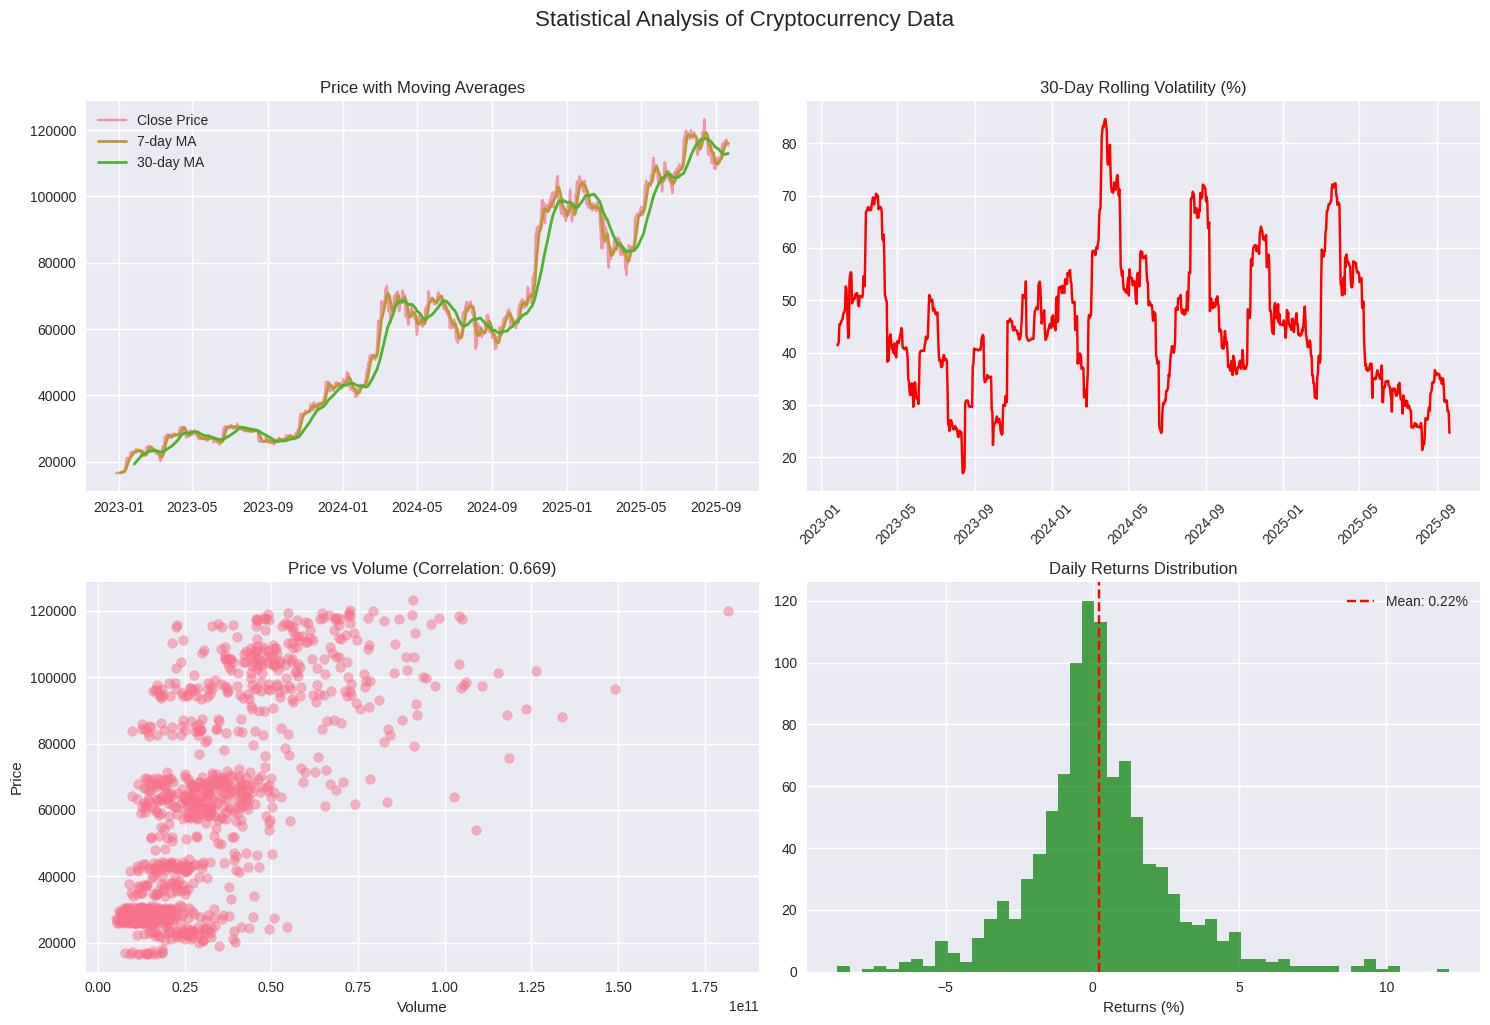

🔮 Visualizing prediction results...


🎯 Evaluating model accuracy...
📊 Starting evaluation with 999 days of data
🔍 Data Quality Check:
   • Missing values in Close: 0
   • Date range: 2022-12-28 00:00:00 to 2025-09-21 00:00:00
   • Price range: $16547.50 to $123344.06
📈 Data Split:
   • Training: 949 days
   • Testing: 50 days
🤖 Training AutoTS model...
Using 2 cpus for n_jobs.
Data frequency is: D, used frequency is: D
Model Number: 1 with model AverageValueNaive in generation 0 of 3
Model Number: 2 with model AverageValueNaive in generation 0 of 3
Model Number: 3 with model AverageValueNaive in generation 0 of 3
Model Number: 4 with model DatepartRegression in generation 0 of 3
Model Number: 5 with model DatepartRegression in generation 0 of 3
Model Number: 6 with model DatepartRegression in generation 0 of 3
Model Number: 7 with model DatepartRegression in generation 0 of 3
Template Eval Error: ImportError('Tensorflow not available, install with pip install tensorflow.') in model 7 in generation 0: DatepartRegression
Mo

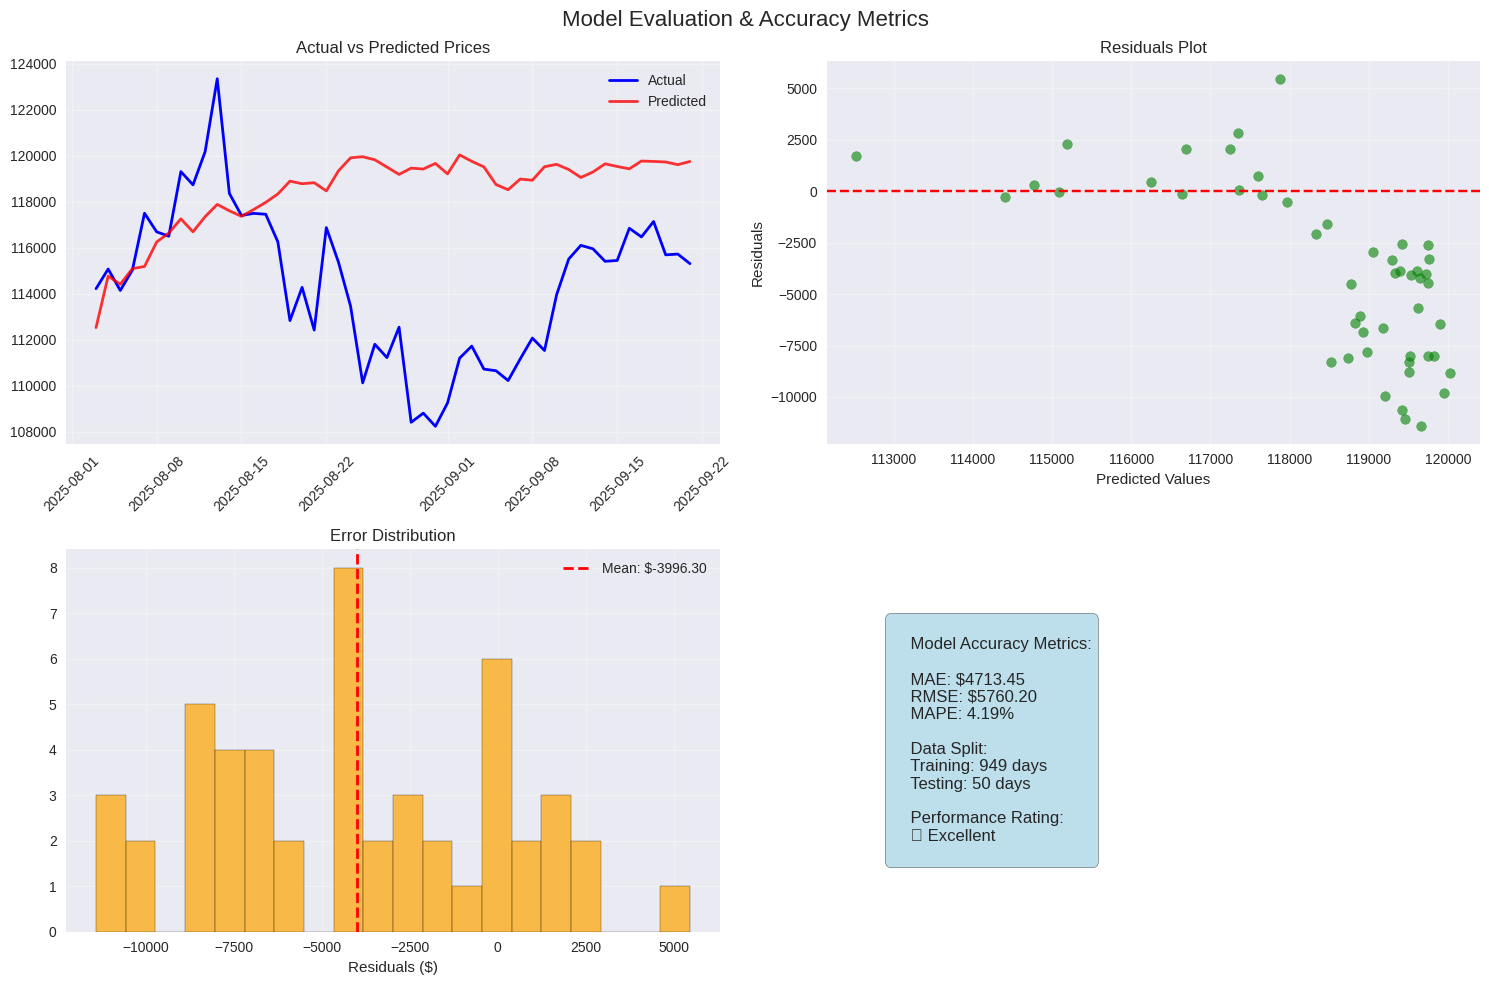

🧠 Creating model insights...


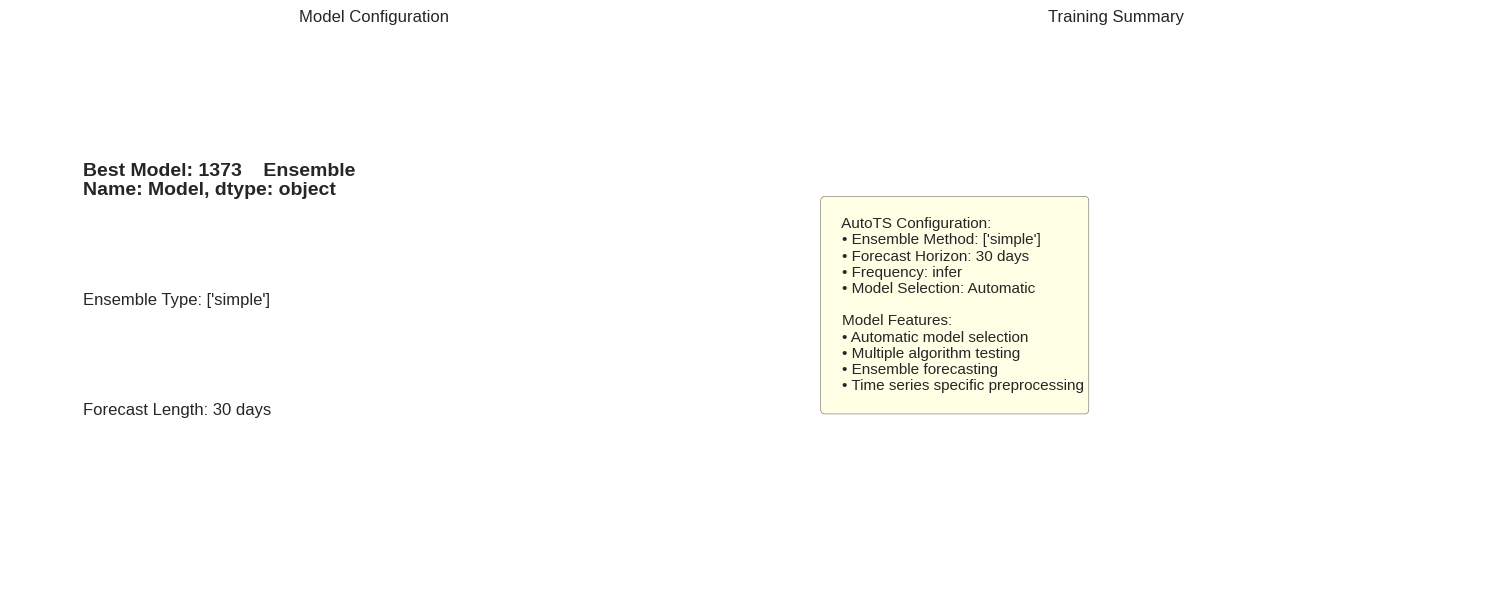

✅ Analysis complete!
📋 Model Performance Summary:
   • MAE: $4713.45
   • RMSE: $5760.20
   • MAPE: 4.19%


In [95]:
# print(data)
create_full_analysis(data, model, prediction)